# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [79]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [80]:
test_response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={cities[0]}").json()
pprint(test_response)

{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': -0.7393, 'lon': -90.3518},
 'dt': 1661476371,
 'id': 3652764,
 'main': {'feels_like': 67.26,
          'humidity': 93,
          'pressure': 1015,
          'temp': 66.54,
          'temp_max': 66.54,
          'temp_min': 66.54},
 'name': 'Puerto Ayora',
 'sys': {'country': 'EC',
         'id': 2005652,
         'sunrise': 1661428852,
         'sunset': 1661472391,
         'type': 2},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 150, 'gust': 7, 'speed': 3}}


In [81]:
weather_chk = []
base_url = "http://api.openweathermap.org/data/2.5/weather?"
for city_index in range(0, len(cities)):
    w_url = f"{base_url}appid={weather_api_key}&units=imperial&q={cities[city_index]}"
    response = requests.get(w_url).json()
    try:
        weather_chk.append(response)
        pprint(f"Processing city number {city_index}, {cities[city_index]}")
    except Exception as e:
        print(f"{cities[city_index]} does not have weather information.")
    

'Processing city number 0, puerto ayora'
'Processing city number 1, mataura'
'Processing city number 2, leh'
'Processing city number 3, barrow'
'Processing city number 4, acapulco'
'Processing city number 5, avarua'
'Processing city number 6, tasiilaq'
'Processing city number 7, atlantic city'
'Processing city number 8, punta arenas'
'Processing city number 9, belushya guba'
'Processing city number 10, coquimbo'
'Processing city number 11, vaini'
'Processing city number 12, upernavik'
'Processing city number 13, bambous virieux'
'Processing city number 14, cape town'
'Processing city number 15, tuktoyaktuk'
'Processing city number 16, vaitupu'
'Processing city number 17, mangrol'
'Processing city number 18, rikitea'
'Processing city number 19, busselton'
'Processing city number 20, klaksvik'
'Processing city number 21, yellowknife'
'Processing city number 22, vila velha'
'Processing city number 23, saint george'
'Processing city number 24, saint-augustin'
'Processing city number 25, ho

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [82]:
weather_chk[0:2]

[{'coord': {'lon': -90.3518, 'lat': -0.7393},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 66.54,
   'feels_like': 67.26,
   'temp_min': 66.54,
   'temp_max': 66.54,
   'pressure': 1015,
   'humidity': 93},
  'visibility': 10000,
  'wind': {'speed': 3, 'deg': 150, 'gust': 7},
  'clouds': {'all': 98},
  'dt': 1661476371,
  'sys': {'type': 2,
   'id': 2005652,
   'country': 'EC',
   'sunrise': 1661428852,
   'sunset': 1661472391},
  'timezone': -21600,
  'id': 3652764,
  'name': 'Puerto Ayora',
  'cod': 200},
 {'coord': {'lon': 168.8643, 'lat': -46.1927},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 54.48,
   'feels_like': 51.8,
   'temp_min': 54.48,
   'temp_max': 54.48,
   'pressure': 1017,
   'humidity': 46,
   'sea_level': 1017,
   'grnd_level': 1011},
  'visibility': 10000,
  'wind': {'s

In [84]:
w_lat = []
w_lng = []
max_temp = []
humidity = []
cloud = []
wind = []
country = []
w_date = []
w_cities = [] # Cities that have weather information

# loop through weather_chk list
for w in range(0, len(weather_chk)):
    try:
        w_lat.append(weather_chk[w]['coord']['lat'])
        w_lng.append(weather_chk[w]['coord']['lon'])
        max_temp.append(weather_chk[w]['main']['temp_max'])
        humidity.append(weather_chk[w]['main']['humidity'])
        cloud.append(weather_chk[w]['clouds']['all'])
        wind.append(weather_chk[w]['wind']['speed'])
        country.append(weather_chk[w]['sys']['country'])
        w_date.append(weather_chk[w]['dt'])
        w_cities.append(weather_chk[w]['name'])
    except Exception as e:
        print(f"{cities[w]} has no {e}")

city_weather_df = pd.DataFrame({
    "City": w_cities,
    "Lat":w_lat,
    "Lng":w_lng,
    "Max Temp":max_temp,
    "Humidity": humidity,
    "Cloudiness":cloud,
    "Wind Speed":wind,
    "Country": country,
    "Date":w_date})
city_weather_df.head()

belushya guba has no 'coord'
vaitupu has no 'coord'
vestbygda has no 'coord'
tsihombe has no 'coord'
illoqqortoormiut has no 'coord'
cagayan de tawi-tawi has no 'coord'
taolanaro has no 'coord'
yefimovskiy has no 'coord'
saleaula has no 'coord'
ambodifototra has no 'coord'
mys shmidta has no 'coord'
sorvag has no 'coord'
marcona has no 'coord'
attawapiskat has no 'coord'
mahaicony has no 'coord'
tuggurt has no 'coord'
sentyabrskiy has no 'coord'
tumannyy has no 'coord'
westpunt has no 'coord'
amderma has no 'coord'
barentsburg has no 'coord'
maloshuyka has no 'coord'
karauzyak has no 'coord'
boljarovo has no 'coord'
kegayli has no 'coord'
umm ruwabah has no 'coord'
mrirt has no 'coord'
jiddah has no 'coord'
umzimvubu has no 'coord'
labutta has no 'coord'
hihifo has no 'coord'
khonuu has no 'coord'
halalo has no 'coord'
kamenskoye has no 'coord'
yusva has no 'coord'
bur gabo has no 'coord'
zolnoye has no 'coord'
tabiauea has no 'coord'
tabulbah has no 'coord'
ituni has no 'coord'
palabu

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,66.54,93,98,3.00,EC,1661476371
1,Mataura,-46.1927,168.8643,54.48,46,0,0.04,NZ,1661476534
2,Leh,34.1667,77.5833,59.18,61,14,4.90,IN,1661476421
3,Barrow,71.2906,-156.7887,53.62,71,0,11.50,US,1661476535
4,Acapulco de Juárez,16.8634,-99.8901,84.02,74,75,5.75,MX,1661476535


In [85]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,5.350000e+02
mean,20.974061,17.196333,67.748654,73.594393,52.857944,7.062262,1.661477e+09
std,33.172267,90.451838,13.200921,18.707836,41.539008,4.678118,1.042644e+02
min,-54.800000,-175.200000,33.350000,1.000000,0.000000,0.000000,1.661476e+09
25%,-5.403450,-63.127600,57.985000,65.000000,8.000000,3.470000,1.661477e+09
50%,26.002300,15.640100,69.760000,78.000000,51.000000,5.880000,1.661477e+09
75%,48.483050,102.219700,77.895000,87.000000,100.000000,9.620000,1.661477e+09
max,78.218600,178.416700,102.560000,100.000000,100.000000,24.630000,1.661477e+09


In [86]:
city_weather_df.to_csv("./city_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [87]:
# There is no city with humidity > 100%

In [88]:
#  Get the indices of cities that have humidity over 100%.


In [89]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

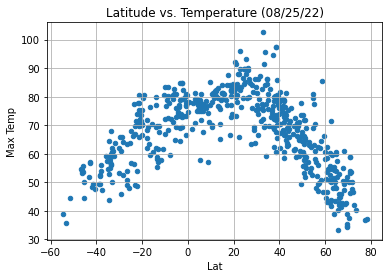

In [90]:
city_weather_df.plot(kind="scatter", x="Lat", y ="Max Temp", title="Latitude vs. Temperature (08/25/22)", grid = True)
plt.savefig("Images/Weather-lat_temp_fig.png")

This plot is displaying the highest temperatures for cities based on their latitude. There seems to be a non-linear (quadratic) relationship between the latitude and the max temperature as it is forming a parabola. The closer the latitude is to 20, the higher the max temperature is. The peak of the temperatures is approximately when the latitude is between 20 and 40. 

## Latitude vs. Humidity Plot

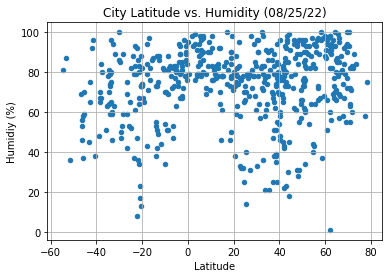

In [91]:
city_weather_df.plot(kind="scatter", x= 'Lat', y = "Humidity", title="City Latitude vs. Humidity (08/25/22)", grid=True)
plt.ylabel("Humidiy (%)")
plt.xlabel("Latitude")
plt.savefig("Images/Weather-lat_humidity.png")

This figure displays the latitude of the cities against the humidity. There does not seem to be any relationship between the latitude and humidity.

## Latitude vs. Cloudiness Plot

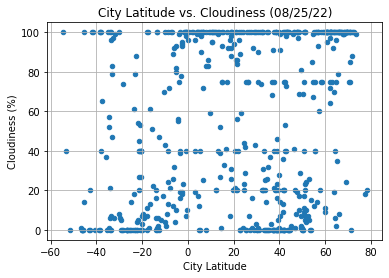

In [92]:
city_weather_df.plot(kind="scatter", x= 'Lat', y = "Cloudiness", title="City Latitude vs. Cloudiness (08/25/22)", grid=True)
plt.ylabel("Cloudiness (%)")
plt.xlabel("City Latitude")
plt.savefig("Images/Weather-lat_cloud.png")

There does not seem to be a relationship between the percentage of clouds and the latitude of the city.

## Latitude vs. Wind Speed Plot

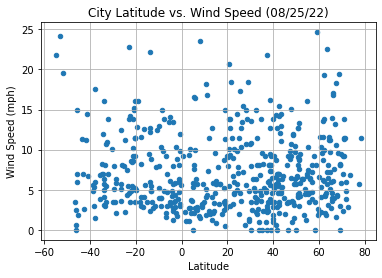

In [93]:
city_weather_df.plot(kind="scatter", x= 'Lat', y = "Wind Speed", title="City Latitude vs. Wind Speed (08/25/22)", grid=True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("Images/Weather-lat_wind.png")

There is not relationship between the wind speed and the latitude of each city. However, the majority of wind speed is between 0 and 15 mph.

## Linear Regression

In [94]:
# Linear Regression Function
def plot_lin_regress(x_values, y_values, x_label, y_label, file_path_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values)+1,min(y_values)+1),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    plt.savefig(file_path_name)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5570706993644584


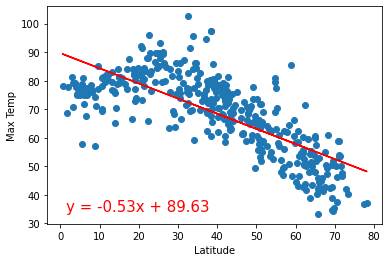

<Figure size 432x288 with 0 Axes>

In [95]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']>=0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']>=0,"Max Temp"], "Latitude", "Max Temp","Images/Weather-north-lat_temp.png")

There seems to be a negative relationship between the max temperature and the latitude for the Northern Hemisphere. As you get further away from the equator, the max temperature decreases. Nevertheless, based on the r-value of 0.5, this seems to be a poor model as only 50.15% of the variance in the data can be explained by this model.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6145379533386207


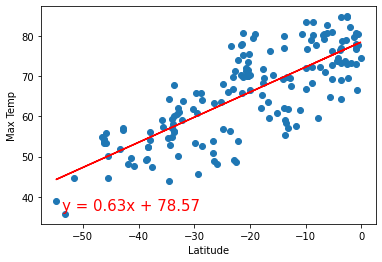

<Figure size 432x288 with 0 Axes>

In [96]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']<0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']<0,"Max Temp"], "Latitude", "Max Temp", "Images/Weather-south-lat_temp.png")

There seems to be a positive relationship between the latitude and max temperature for cities in the southern hemisphere. As the latitude increases, the temperature increases. Nevertheless, the model is fairly poor. It has an R-square of 59.22% which means that 59.22% of the variance in the data can be explained by this model.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 6.001137097987758e-05


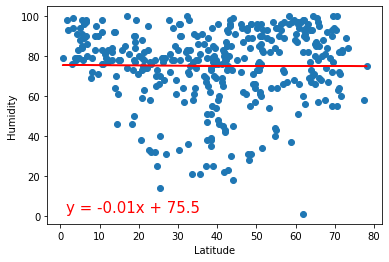

<Figure size 432x288 with 0 Axes>

In [97]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']>=0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']>=0,"Humidity"], "Latitude", "Humidity", "Images/Weather-north-lat_humidity.png")

There does not seem to be any relationship between the latitude and humidity of each city. The R-square value is extremely low at 0.03%. Therefore, 0.03% of the data can be explained by this model. Thus, this linear model would be a poor predictor of humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.055237234643220584


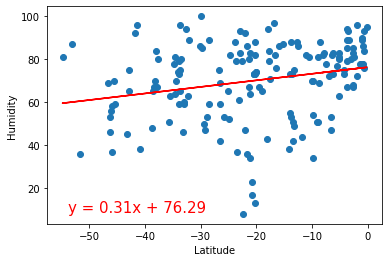

<Figure size 432x288 with 0 Axes>

In [98]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']<0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']<0,"Humidity"], "Latitude", "Humidity", "Images/Weather-south-lat_humidity.png")

There is a weak positive relationship between the latitude and humidity for southern cities; however it is not a strong one. The R-square value is low at 0.59%. Therefore, 0.59% of the data can be explained by this model. Thus, this linear model would be a poor predictor of humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0036155171786453146


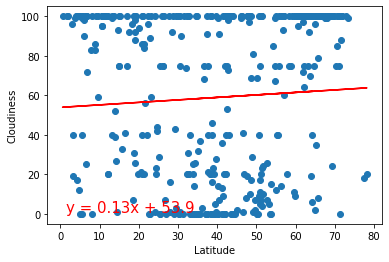

<Figure size 432x288 with 0 Axes>

In [99]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']>=0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']>=0,"Cloudiness"], "Latitude", "Cloudiness", "Images/Weather-north-lat_cloud.png")

There is no relationship between the latitude and percentage of clouds. The R-square value is extremely low at 0.05%. Therefore this would be a poor model to predict the percentage of clouds as only 0.05% of data can be explained by this model.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.040235402266009156


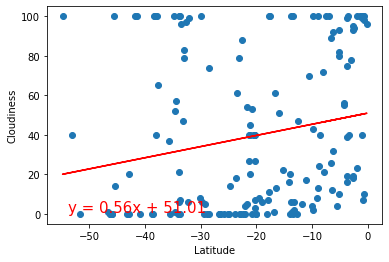

<Figure size 432x288 with 0 Axes>

In [100]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']<0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']<0,"Cloudiness"], "Latitude", "Cloudiness", "Images/Weather-south-lat_cloud.png")

There is no relationship between the latitude and percentage of clouds. The R-square value is extremely low at 0.11%. Therefore this would be a poor model to predict the percentage of clouds as only 0.11% of data can be explained by this model.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00879513603724698


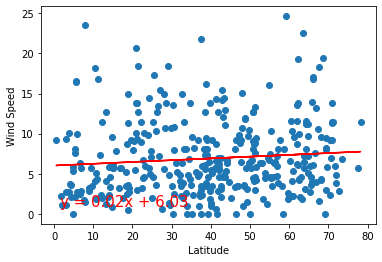

<Figure size 432x288 with 0 Axes>

In [101]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']>=0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']>=0,"Wind Speed"], "Latitude", "Wind Speed", "Images/Weather-north-lat_wind.png")

There is a no relationship between the latitude and percentage of clouds. The R-square value is extremely low at 0.08%. Therefore this would be a poor model to predict the wind speed as only 0.08% of data can be explained by this model.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.026853853001039808


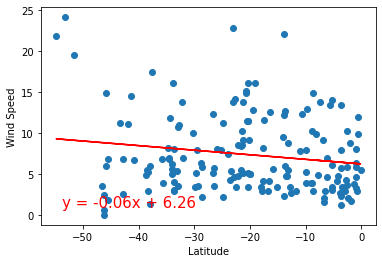

<Figure size 432x288 with 0 Axes>

In [102]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']<0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']<0,"Wind Speed"], "Latitude", "Wind Speed", "Images/Weather-south-lat_wind.png")

There is no relationship between the latitude and the wind speed as the R-square value is low. R-sqaure is 1.81% which indicates that 1.18% of the data can be explained by the model. Thus, this model would not be a good model to use to predict wind speed.